The Proctor compaction test is used by engineers and soil scientists to determine the moisture content at which soil achieves maximum bulk density. This soil moisture level is known as the critical moisture content (CMC). In farming, excessive soil compaction can hinder root growth, reduce soil water storage, and create poor seedbed conditions. Conversely, in construction, optimal compaction ensures stable foundations and roads.


In [4]:
# Import modules
import pandas as pd
import numpy as np
import numpy.polynomial as P
import matplotlib.pyplot as plt


In [7]:
# Read data
df = pd.read_csv('../datasets/proctor_test.csv', skiprows=[0])

# Inspect a few rows
df.head(3)


,gravimetric_water,dry_bulk_density
0,0.075,1.351
1,0.089,1.428
2,0.106,1.485


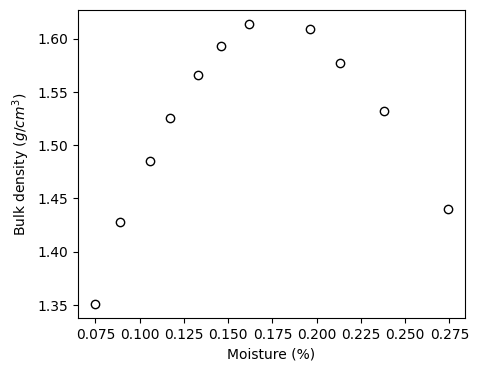

In [9]:
# Create figure to inspect data
plt.figure(figsize=(5,4))
plt.scatter(df['gravimetric_water'], df['dry_bulk_density'], facecolor='w', edgecolor='k')
plt.xlabel('Moisture (%)')
plt.ylabel('Bulk density ($g/cm^3$)')
plt.show()


In [11]:
# Fit a polynomial model to the data
# We can fit a second or fith order polynomial depending on the complexity of the dataset
par = P.polynomial.polyfit(df['gravimetric_water'], df['dry_bulk_density'], deg=5)

# Print value of fitted parameters
print(par)


[ 7.06976765e-01  1.35906305e+01 -9.59296502e+01  5.20447713e+02
 -1.85951295e+03  2.58133225e+03]


In [7]:
polyfun = np.poly1d(par) # Create objec
print(polyfun) # polynomial function


        2
-22.09 x + 8.034 x + 0.8835


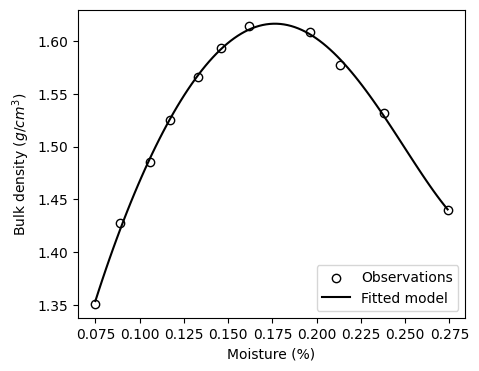

In [13]:
# Create figure showing the fitted model and the observed data points
x_curve = np.linspace(df['gravimetric_water'].min(), df['gravimetric_water'].max(), 100)
y_curve = P.polynomial.polyval(x_curve, par)

plt.figure(figsize=(5,4))
plt.scatter(df['gravimetric_water'], df['dry_bulk_density'], 
            facecolor='w', edgecolor='k', label='Observations')
plt.plot(x_curve, y_curve, '-k', label='Fitted model')
plt.xlabel('Moisture (%)')
plt.ylabel('Bulk density ($g/cm^3$)')
plt.legend()
#plt.savefig('figure_1.jpg', dpi=300)
plt.show()

In [15]:
# Find and print the critical water content to one decimal place.
idx_cwc = np.argmax(y_curve)
cwc = x_curve[idx_cwc]

print(f'The CWC is {round(cwc,2)} %')


The CWC is 0.18 %


## Why does the curve have this shape?

Dry soil has high friction between particles, limiting compaction. Moisture acts as a lubricant, allowing particles to move and re-organize, thus enabling greater compaction or density. However, excessive water reduces compaction, as water, being incompressible, absorbs some of the applied stress, preventing further soil compression.

## References

Davidson, J.M., Gray, F. and Pinson, D.I., 1967. Changes in Organic Matter and Bulk Density with Depth Under Two Cropping Systems 1. Agronomy Journal, 59(4), pp.375-378.

Kok, H., Taylor, R.K., Lamond, R.E., and Kessen, S.1996. Soil Compaction: Problems and Solutions. Department of Agronomy. Publication no. AF-115 by the  Kansas State University Cooperative Extension Service. Manhattan, KS. You can find the article at this link: https://bookstore.ksre.ksu.edu/pubs/AF115.pdf

Proctor, R., 1933. Fundamental principles of soil compaction. Engineering news-record, 111(13).